### Importing the necessary libraries

In [3]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

In [4]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D, Conv1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


### Download the dataset from Kaggle
https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [5]:
movie_reviews = pd.read_csv('IMDB_Dataset.csv')

### Data Exploration

In [6]:
movie_reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
movie_reviews.isnull().values.any()

False

In [8]:
movie_reviews.shape

(50000, 2)

In [9]:
movie_reviews["review"][3]

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

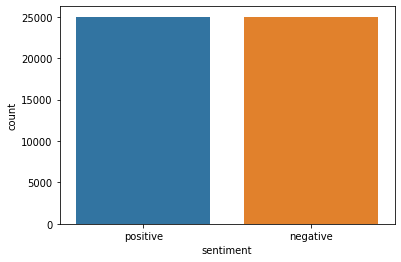

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(x='sentiment', data=movie_reviews)

### Pre-processing of text
- Removing html tags
- Removing punctutations and numbers
- Removing Multiple spaces
- so on

In [11]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [12]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [11]:
X = []
sentences = list(movie_reviews['review'])
for sen in sentences:
    X.append(None))

In [12]:
X[3]

'Basically there a family where little boy Jake thinks there a zombie in his closet his parents are fighting all the time This movie is slower than soap opera and suddenly Jake decides to become Rambo and kill the zombie OK first of all when you re going to make film you must Decide if its thriller or drama As drama the movie is watchable Parents are divorcing arguing like in real life And then we have Jake with his closet which totally ruins all the film expected to see BOOGEYMAN similar movie and instead watched drama with some meaningless thriller spots out of just for the well playing parents descent dialogs As for the shots with Jake just ignore them '

### Creating numerical labels from categorical values

In [14]:
y = movie_reviews['sentiment']

y = np.array(list(map(None)))
y

array([1, 1, 1, ..., 0, 0, 0])

### Split the dataset to train and test

In [14]:
X_train, X_test, y_train, y_test = None # 0.20 for testing and seed = 42

### Use Tokenizer to integer encode the documents

In [15]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = None
X_test = None

### Pad Sequences to create equal-length inputs

In [16]:
vocab_size = len(tokenizer.word_index) + 1

maxlen = None

X_train = None
X_test = None

### Load GloVe embedding into memory

In [17]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    None
glove_file.close()

### Create Embedding matrix for our Kaggle dataset

In [18]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

### Build the model - Convolutional Neural Network

In [22]:
model = Sequential()

embedding_layer = None # Embedding layer

model.add(None) # Convolutional Layer with 128 filters and 5 kernel size with relu activation
model.add(None) # Pooling layer
model.add(None) # Dense layer with its appropriate activation function

### Compile the model

In [23]:
model.compile(None) # Fill in with appropriate parameters

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          9254700   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 9,318,957
Trainable params: 64,257
Non-trainable params: 9,254,700
_________________________________________________________________
None


### Fit the model

In [24]:
# Experiment with these values and note down the losses and accuracies
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)


Train on 32000 samples, validate on 8000 samples
Epoch 1/6
32000/32000 [==============================] - 13s 419us/step - loss: 0.4995 - acc: 0.7546 - val_loss: 0.3983 - val_acc: 0.8225
Epoch 2/6
32000/32000 [==============================] - 13s 391us/step - loss: 0.3707 - acc: 0.8353 - val_loss: 0.3937 - val_acc: 0.8225
Epoch 3/6
32000/32000 [==============================] - 13s 402us/step - loss: 0.3203 - acc: 0.8657 - val_loss: 0.3866 - val_acc: 0.8242
Epoch 4/6
32000/32000 [==============================] - 11s 353us/step - loss: 0.2840 - acc: 0.8835 - val_loss: 0.3415 - val_acc: 0.8482
Epoch 5/6
32000/32000 [==============================] - 13s 392us/step - loss: 0.2478 - acc: 0.9046 - val_loss: 0.3538 - val_acc: 0.8438
Epoch 6/6
32000/32000 [==============================] - 13s 395us/step - loss: 0.2208 - acc: 0.9184 - val_loss: 0.3390 - val_acc: 0.8508


### Evaluate Training phase

In [25]:
score = model.evaluate(X_train, y_train, verbose=1)
score

40000/40000 [==============================] - 7s 174us/step


[0.20868501749038695, 0.9297249913215637]

In [26]:
print("Train Loss:", score[0])
print("Train Accuracy:", score[1])

Train Loss: 0.20868501749038695
Train Accuracy: 0.9297249913215637


### Evaluate Testing phase

In [28]:
score = model.evaluate(X_test, y_test, verbose=1)

10000/10000 [==============================] - 2s 190us/step


In [29]:
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

Test Loss: 0.33747961492538453
Test Accuracy: 0.8496000170707703


### Plot the training and testing accuracy and loss

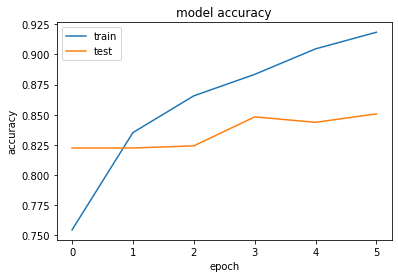

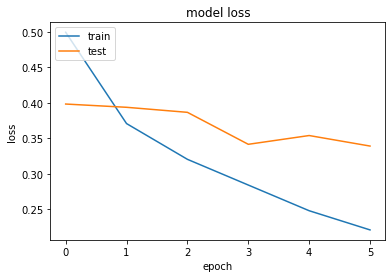

In [30]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

### What's happening here?
- Are we doing any better?
- Is there room for improvement?
- Conclusions ???